# DataSet SlideDeck - Fordgo Bike System
## by Priscilla Ogwa

## Investigation Overview

> In this investigation, I intended to examine the features of bike riders that might be utilized to forecast the length of their trips (Duration). I was not necessarily concerened about the distance travelled, I was more interested in how long each user was willing to go for because there was a chance that  the length of their journey was dependent on their strength. Factors that might affect their strength could be their age, gender or possibly user type.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. In this data set a new column generations was created, where users were grouped according to their age range, also the duration was converted from seconds to minutes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike1 = pd.read_csv('fordgobike1.csv')

## Distribution by Duration

> Duration shows how long a trip was, duration was originally in seconds but was converted to minutes. The distribution of duration has a unimodal form when plotted on a logarithmic scale, with a peak at roughly 10 minutes.


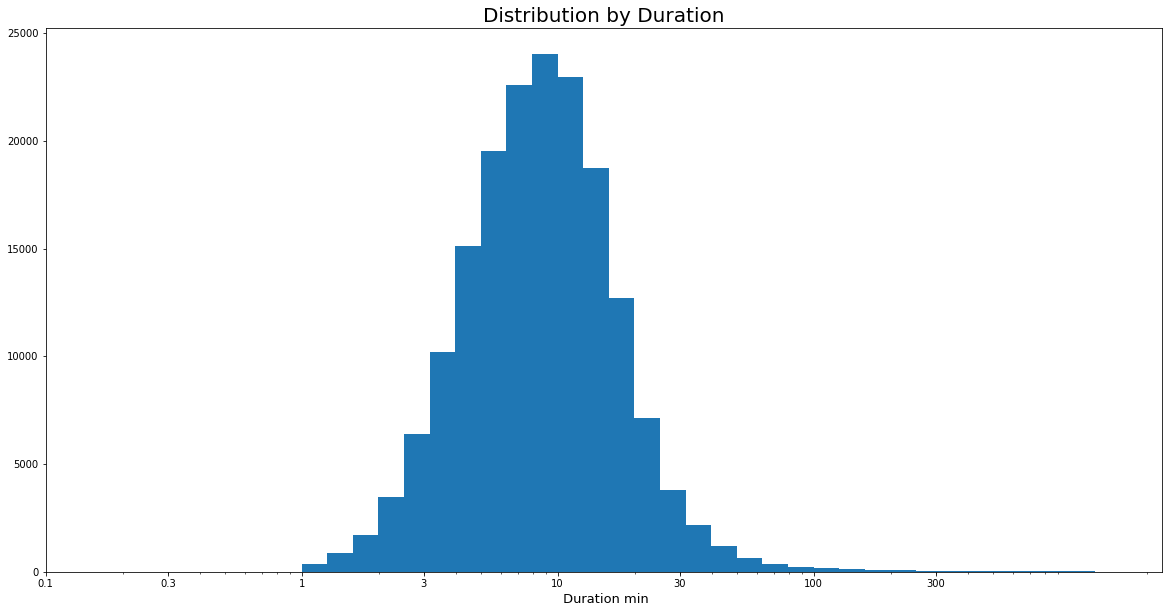

In [3]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(fordgobike1['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[20, 10])
plt.hist(data = fordgobike1, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel(' Duration min', size=13)
plt.title('Distribution by Duration', size=20)
plt.show();

## Distribution of Trips comparing Member age and Duration 

> From the  investigation, the duration travelled by users was compared with regards to their age. 
> From the chart it is clear that 21years old travelled the longest, age 22 to 69 have a fairly steady trip.

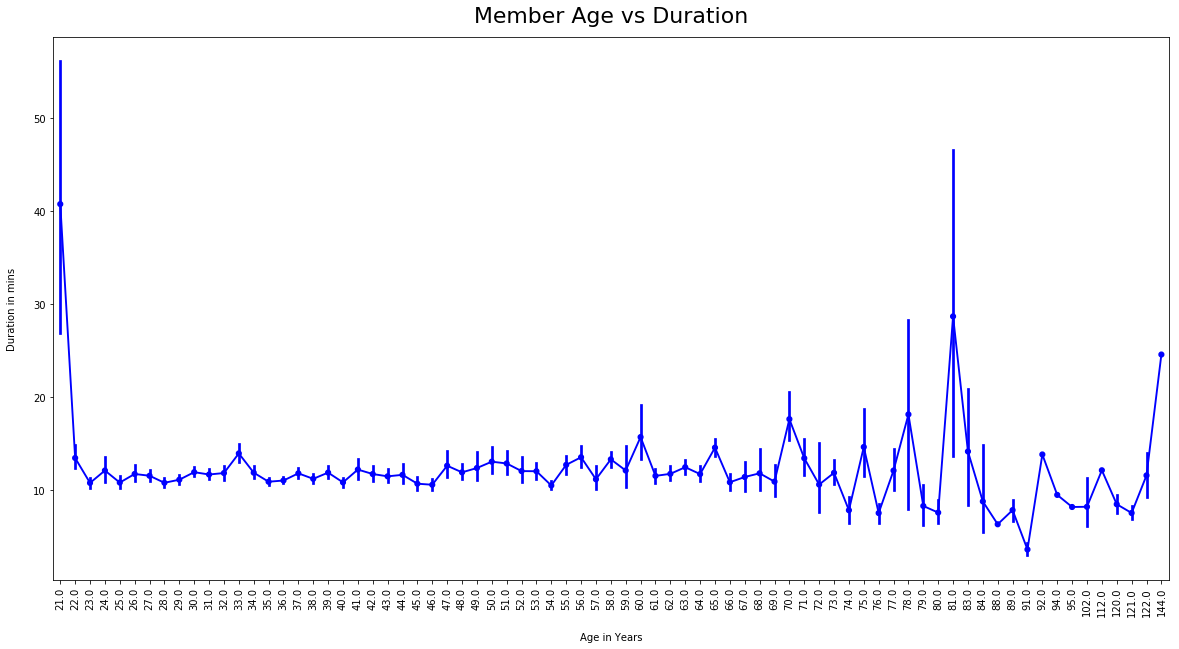

In [4]:
plt.figure(figsize=(20,10))
sb.pointplot(data = fordgobike1, x='member_age', y='duration_min', scale=.7, color='blue')
plt.title('Member Age vs Duration', fontsize=22, y=1.015)
plt.xlabel('Age in Years', labelpad=16)
plt.ylabel('Duration in mins', labelpad=16)
plt.xticks(rotation = 90);

## Distribution of Trip comparing User type and their generations

> Members were grouped using the years they were born into generations. The years ranged from 1878 to 2001. 8 generations were created including:
1. Too old (Anyone born before 1883)
2. Lost generation (1883-1990)
3. Greatest generation (1901-1927)
4. Silent generation (1928-1945)
5. Baby Boomers (1946-1964)
6. Generation X (1965-1980)
7. Millenials (1981-1996)
8. Generation Z (Anyone born after 1996)

> The first chart shows the count of users in each generation according to their user type. Millenials have the highest count of customers and subscribers.

> The second chart shows the average time it takes users to travel, grouping them according to thier generation and user type. Greatest generation has no customers, same with too old subscribers. 

> Generation Z customers take the longest trips

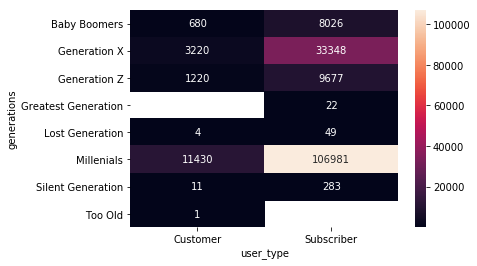

In [6]:
gen_counts = fordgobike1.groupby(['generations', 'user_type']).size()
gen_counts = gen_counts.reset_index(name='count')
gen_counts = gen_counts.pivot(index = 'generations', columns = 'user_type', values = 'count')
sb.heatmap(gen_counts, annot = True, fmt = '.0f');

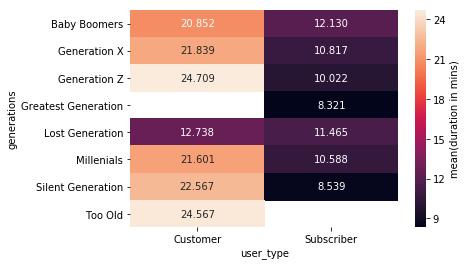

In [7]:
dur_means = fordgobike1.groupby(['user_type', 'generations']).mean()['duration_min']
dur_means = dur_means.reset_index(name = 'duration_avg')
dur_means = dur_means.pivot(index = 'generations', columns = 'user_type',
                            values = 'duration_avg')
sb.heatmap(dur_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration in mins)'});

## Distribution of Trip comparing Gender and User type

> The first chart shows that most users are male and these males are subscribers.

> The second chart shows that although the first fact is true, gender 'other' customers take the longest trip wit respect to duration.

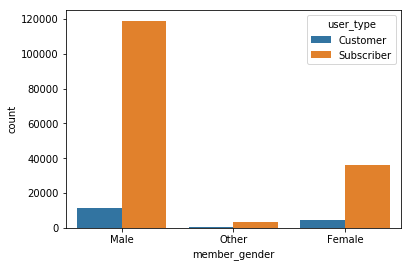

In [8]:
sb.countplot(data = fordgobike1, x = 'member_gender', hue = 'user_type');

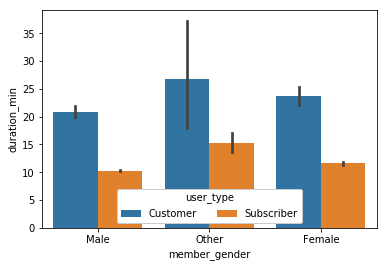

In [9]:
gen = sb.barplot(data = fordgobike1, x = 'member_gender', y = 'duration_min', hue = 'user_type')
gen.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to slides
[NbConvertApp] Writing 437142 bytes to Part_II_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_notebook.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
